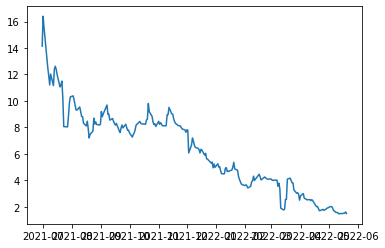

In [22]:
import typing as t
import matplotlib.pyplot as plt# plotting library
import yfinance as yf
sp500 = yf.Ticker("^GSPC").history(period='max')
msft = yf.Ticker("MSFT").history(period='max')
didi = yf.Ticker("DIDI").history(period='max')
didi_close = didi['Close']
plt.plot(didi_close)


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

In [3]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(didi_close, test_size=0.15, shuffle=False)

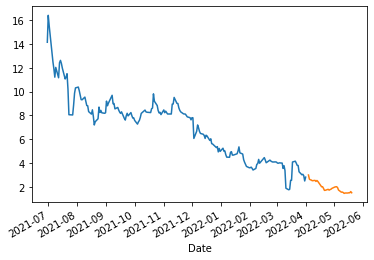

In [4]:
train_data.plot()
test_data.plot()

In [38]:
def prep_data(ts_data: pd.Series):
    """Prepare data for extrapolation

    Args:
        ts (array like): time series, like stock data
    Return: tain_data, test_data
    """
    train_data, test_data = train_test_split(ts_data, test_size=0.15, shuffle=False)
    return train_data, test_data

def ts_extrapolate(ts_train: pd.Series, ts_test: pd.Series, order: t.Tuple=(5, 1, 3)):
    """Extrapolate data from ts_train to ts_test

    Args:
        ts_train (Series): train portion of the time series, index should be time
        ts_test (Series): test portion of the time series, index should be time
    Return:
        predicted (Series), lower bound (Series), upper bound
    """
    model = pm.ARIMA(order=order)
    model = model.fit(ts_train)
    ts_pred, cfi = model.predict(n_periods=len(test_data), return_conf_int=True)
    lower_bound = pd.Series(cfi[:, 0], index=ts_test.index)
    upper_bound = pd.Series(cfi[:, 1], index=ts_test.index)
    return pd.Series(ts_pred, test_data.index), lower_bound, upper_bound

def plot_extrapolate(ts_train: pd.Series, ts_test: pd.Series, ts_pred: pd.Series, lower_bound: pd.Series, upper_bound: pd.Series):
    ts_train.plot()
    ts_test.plot(color='g')
    ts_pred.plot(color='r')
    plt.fill_between(lower_bound.index, lower_bound, upper_bound, color='k', alpha=.10)

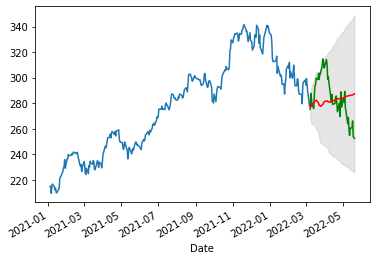

In [44]:
train_data, test_data = prep_data(msft.Close.loc['2021':])
pred, lb, up = ts_extrapolate(ts_train=train_data, ts_test=test_data, order=(10, 1, 3))
plot_extrapolate(train_data, test_data, pred, lb, up)